# Linear and Nonlinear Operations

Throughout the semester we will invoke models which employ layers of linear and non-linear operations on our data. Recall that deep learning algorithms are the subclass of machine learning algorithms (algorithms which learn from data) which learn complex concepts by representing them as a deep graph with many layers. This enables deep learning algorithms to learn targeted complex concepts from simpler concepts. As we will see, such a graph must contain both linear and nonlinear functions to be useful to us. To prepare to understand why this is, we will look at some basic linear and nonlinear functions, and try to perform useful tasks with them by hand, before progressing on to use numerical optimization methods to enable our graphs of linear and nonlinear functions to learn from data automatically.

In [9]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.size"] = 16
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Linear Operations

For our purposes in this class, a linear operation is a function or process $f$ with output $y$ that changes proportionally to changes in an input $x$. The output and input can be scalars, vectors, matrices, random variables, or even other functions. When considering how a linear process can affect a *function* input it is often helpful to imagine the function as a vector with an infinite number of components, one component for the value of the function at each location.

If a function or process is linear, a change in its input, $\Delta x = x_1 - x_0$, will yield a proportional change in its output $\Delta y = f(x_1) - f(x_0)$, such that $\Delta y = A \Delta x$, where $A$ is a constant.

To find the output of a linear operation applied to a sum, we can simply sum the outputs that would result from each individual input.

$$
f(x_1 + x_2) = f(x_1) + f(x_2).
$$

Scaling the input of a linear operation by a constant value will scale the output by the same amount.

$$
f(ax) = af(x).
$$

Putting these properties together, we have the following relationship for a linear function.

$$
f(a_1 x_1 + a_2 x_2) = a_1 f(x_1) + a_2 f(x_2)
$$

Plotting any output of a linear operation with respect to one of its inputs yields a straight line. We can visualize how a change in the input of a linear operation affects a change in output by plotting some inputs and deviations from those inputs. Below we define a simple linear function, and then specify some starting values, $x_0$, and some deviations from those values, $\Delta x$, and observe how these propagate through the function.

We see the following
1. Regardless of the starting value, the change in input always causes a proportional change in output.
2. The sum of two inputs yields an output proportional to that sum.

In [7]:
from function_demos import plot_dx_list


def simple_linear_function(x):
    y = 10 * x
    return y


x = np.arange(-8, 8, 0.01)
amplifier_output = simple_linear_function(x)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, amplifier_output, "k", linewidth=2)

x0_values = [-4, 2, 4]
dx_values = [2, 2, 4]
color_strings = ["b", "g", "r"]


plot_dx_list(
    ax, x, simple_linear_function, x0_values, dx_values, color_strings
)

## Example Linear Operations

The following are all linear operations. Notice how all of these functions fit the template $y = Ax$ in some form.

### As Simple As it Gets!

The most basic linear function is a straight line. For example, 
$$
f(x) = 2x
$$
where
$$
y=Ax,\ A = 2.
$$

Here we have a linear operation with a scalar input, scalar output, and a single scalar parameter.

### Vector Input, Scalar Output

A simple vector-in, vector-out linear operation can be defined via a dot product. For example,
$$
\mathbb{f}(\mathbb{x}) = 2x_1 + 3x_2 + 6x_3
$$
where
$$
\mathbb{y} = \mathbb{a} \cdot \mathbb{x},
$$
and the parameters and input variables are both vectors,
$$
\begin{align*}
\mathbb{a} &= (2,3,6),\\
\mathbb{x} &= (x_1, x_2, x_3).
\end{align*}
$$

Here the dot product operation combines the vector input with the parameter vector to produce a scalar output.

### Vector Input, Vector Output
Consider a linear matrix equation,
$$
\begin{align*}
\begin{pmatrix}y_1\\y_2\\y_3\end{pmatrix}
&=
\begin{pmatrix}
1&5&2\\
3&8&4\\
2&3&9\\
\end{pmatrix}
\begin{pmatrix}x_1\\x_2\\x_3\end{pmatrix}, \\
\end{align*}
$$
where
$$
\begin{align*}
\mathbb{y} &= \mathrm{A}\mathbb{x}, \\
\mathrm{A} &=
\begin{pmatrix}
1&5&2\\
3&8&4\\
2&3&9\\
\end{pmatrix}.
\end{align*}
$$

Here the parameters of the operation are defined by the matrix $\mathrm{A}$. The input is a vector, and the output is another vector resulting from a matrix multiplication.

### Random Variable Input, Scalar Output
The expected value operator, $\mathrm{E}[X]$, is an example of a linear operator that accepts a random variable as its input and returns a scalar value as its output.

$$
\mathrm{E}[X] = \int_{-\infty}^{\infty} x f(x) dx .
$$

Expected value is linear.

$$
\begin{align*}
\mathrm{E}[X + Y] &= \mathrm{E}[X] + \mathrm{E}[Y] \\
\mathrm{E}[aX] &= a\mathrm{E}[X]
\end{align*}
$$

Here the $y = Ax$ form is less obvious at first. To make it more obvious, consider the expected value of a discrete variable,

$$
\begin{align*}
\mathrm{E}[x] &= x_1 p_1 + x_2 p_2 + \cdots + x_K p_K \\
    &= \sum_k x_k p_k \\
    &= \mathbb{x} \cdot \mathbb{p}.
\end{align*}
$$

Here, the linearity of the operation is obvious when we think of the possible values of the discrete random variable as a vector, and their respective probabilities as another vector,

$$
\begin{align*}
\mathbb{x} = \begin{pmatrix}x_1 & \cdots & x_K \end{pmatrix}, \\
\mathbb{p} = \begin{pmatrix}p_1 & \cdots & p_K \end{pmatrix}.
\end{align*}
$$

While it might be difficult at first to see how this relates to the definition of expected value for continuous distributions, it becomes apparent when considering the integral as a sum of increasingly small rectangles,

$$
\begin{align*}
\mathrm{E}[X] &= \int_{-\infty}^{\infty} x f(x) dx, \\
    &= \lim_{\alpha \to \infty} \int_{-\alpha}^\alpha x f(x) dx, \\
    &= \lim_{\alpha \to \infty} \lim_{\Delta x \to 0} \begin{pmatrix}x_1 p_1 + \cdots + x_K p_K \end{pmatrix} \\
    &= \lim_{\alpha \to \infty} \lim_{\Delta x \to 0} \mathbb{p} \cdot \mathbb{x},
\end{align*}
$$
where
$$
\begin{align*}
x_k &= x_{k-1} + \Delta x,\ x_1 = -\alpha,\ x_K = \alpha,\\
p_k &= f(x_k).
\end{align*}
$$

This demonstration is not rigorous, but it is helpful in this context to imagine the continuous random variable $x$ as a vector with an increasingly many components, and to imagine its expected value as a dot product with a vector of the probabilities of occurrence for each respective value of the random variable.

To make this explanation rigorous, we can replace the dot product with the generalized notion of an inner-product, which is defined for functions as

$$
\langle u, v \rangle = \int_a^b u(t) v(t) dt.
$$

Like the dot product, the inner-product is linear.

### Function Input, Function Output

A convolution operation is an example of a linear operation with a function input and a function output.

$$
\begin{align*}
h(x) &= f(t) * g(t) \\
     &= f(\tau) g(t-\tau) d \tau
\end{align*}
$$

Convolution is a linear operation.

$$
(a f_1(t) + b f_2(t)) * g(t) = a f_1(t) * g(t) + b f_2(t) * g(t)
$$

This can be made apparent upon inspection of the convolution formula,

$$
\lparen f * g \rparen = \int_{-\infty}^{\infty} f(\tau)g(t - \tau) d\tau,
$$

using a similar argument to that used to demonstrate the linearity of the expected value operation.

### Integrals

In general, the linearity of the above operations on distributions and functions follows from the linearity of integrals,

$$
\int_a^b \lparen \alpha f(x) + \beta g(x) \rparen dx = \alpha \int_a^b f(x) dx + \beta \int_a^b g(x) dx,
$$

which itself follow from the Riemann sum definition of integrals.

## To deal with nonlinearity is to have non linearity in algorithms

## Nonlinear Operations

As the name suggests, a nonlinear operation is any operation that is *not linear*. For our purposes in this class, this is any function or process $f$ with output $y$ where the description of linear operations above is not true, i.e., a nonlinear operation is one where a change in input $x$ does *not* always yield a proportional change in output $y$. As with linear processes, the output and input to a nonlinear process can be scalars, vectors, matrices, random variables, or even other functions.

If a function or process is nonlinear, a change in its input, $\Delta x = x_1 - x_0$, will not always yield a proportional change in its output $\Delta y = f(x_1) - f(x_0)$, such that $\Delta y \neq A \Delta x$, for a constant $A$.

The convenient relationships we are used to holding true for linear functions are not always true for nonlinear functions:

$$
\begin{align*}
f(x_1 + x_2) &\neq f(x_1) + f(x_2), \\
f(ax) &\neq af(x), \\
f(a_1 x_1 + a_2 x_2) &\neq a_1 f(x_1) + a_2 f(x_2).
\end{align*}
$$

This can make solving for analytical relationships about how a nonlinear operation will affect a dataset difficult, and often completely intractable, since the usual rules which allow simplification of calculations involving linear operations are not guaranteed to hold true. While it is often possible to identify regions where a function is linear (piecewise linear functions) or to study a function's behavior on a small enough interval that it is approximately linear, as we will see throughout the semester, we often need to resort to numerical methods to determine how a nonlinear function will affect a dataset. This is especially true when we need to use many layers of nonlinear operations, which we will also see is often necessary.

Solving for a nonlinear function, out of a group of hypothesized nonlinear functions, which performs a desired task on a dataset is the challenge at the heart of all machine learning problems and our main motivation for beginning our study of practical AI with an introduction to linear and nonlinear functions. 

### Intuition for Nonlinear Operations

Unfortunately, the typical "description" of nonlinear functions is not very descriptive or intuitive! If we know a function is linear, we know it belongs to a class of functions that is special, for which many methods and simplifications from many specialized fields of study apply. However, if we only know that a function is *not* linear, we do not know much about it, other than the fact that it does not belong to this category and these simplifications do not apply. Meanwhile, most processes we observe in the real world are nonlinear. This is due to the fact that any process in the real world is subject to practical *limitations*. The real world is always imposing practical constraints on processes within it. These practical constraints are the source of nonlinear behaviors in the real world. It is helpful to consider some examples before considering example nonlinear mathematical functions.

#### Springs

One of the simplest and most familiar examples of nonlinearity is the behavior of a spring. We often use a simplified version of Hooke's Law to study springs in introductory physics classes. The simplified version of Hook's law states that the amount of force the spring pulls with is proportional to the distance the spring is displaced from its rest state and is exerted in the opposite direction of the displacement, expressed as

$$
F_S = -kx.
$$

This is simple and intuitive. The further we pull a spring away from its position at rest, the harder it pulls back. This is true in the lab under controlled conditions, when we use small springs and displace them with commensurately small forces. But is it true in practice? Surely it is not.

What if we took the spring from a mechanical pencil and asked the strongest student in class to stretch it out, instead of attaching it to a small weight? What if we fixed it to a car and stretched it out? Would we still expect the spring to pull back with a force proportional to the distance we stretched it, $x$?

It is easy to see how this is not possible. The string only has so many molecules in it, and their bonds all have a finite strength. For any given spring, there is a certain point at which we will stretch it so much that it will not be able to pull back as hard as it used to, and a further point at which we will stretch it so far that it will break! These limits are not accounted for in the most basic version of Hooke's law, but are at the heart of how more advanced formulations of Hooke's law and other principles from mechanical engineering enable predicting the behavior of mechanical objects in the real world.


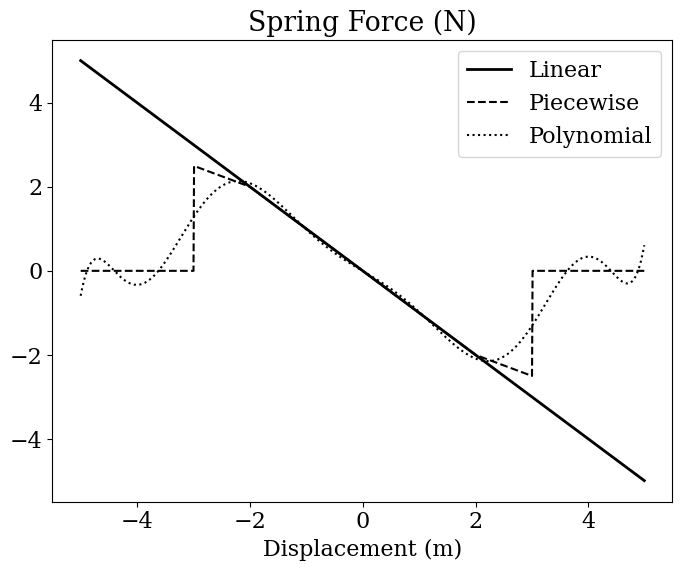

In [4]:
from spring_demos import SpringForceModel

displacement_x = np.arange(-5, 5, 0.01)

spring_model = SpringForceModel(
    spring_constant_normal_regime_k1=1,
    spring_constant_unrecoverable_regime_k2=0.5,
    recoverable_limit_x1=2,
    breakdown_limit_x2=3,
    n_coefficients=10,
)

force_linear = spring_model.compute_spring_force_linear(displacement_x)
force_piecewise = spring_model.compute_spring_force_piecewise(displacement_x)

spring_model.fit_polynomial_model(displacement_x)
force_polynomial = spring_model.compute_spring_force_polynomial(displacement_x)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Spring Force (N)")
ax.set_xlabel("Displacement (m)")
ax.plot(displacement_x, force_linear, color="k", linewidth=2, linestyle="-")
ax.plot(displacement_x, force_piecewise, color="k", linestyle="--")
ax.plot(displacement_x, force_polynomial, color="k", linestyle=":")
ax.legend(("Linear", "Piecewise", "Polynomial"))

What might be some advantages and disadvantages of each of these models?

not capture real life model

- piecewise -> not nice derivative, 1st derivative fine, but 2nd derivative isnt realistic.

- Non linear giver lot of explanatory power, but tradeoff, is that the output is not realistic.

#### Amplification

As another intuitive example (perhaps for those more inclined to think of sounds rather than of mechanical objects), consider an audio amplifier. We are all familiar with audio amplifiers. We plug in a device which produces a quiet signal, like an electric guitar or a microphone, and a louder signal is produced as a result. It is tempting to represent an audio amplifier via this simple relationship but reality is not so easily captured. Imagine we have a function, $x(t)$, which gives us the displacement of a guitar string from its center with respect to time. Once the guitar string is plucked, it moves back and forth, and we would expect $x(t)$ to display a rhythm of peaks and valleys. Since the string is metal, it generates an electromagnetic field which creates a small voltage that is carried across a set of wires to the guitar's audio jack.

However, electric guitars are not designed to be heard well without amplification, so we need to plug the guitar into an amplifier. The amplifier will accept as input the voltage captured by the guitar's magnetic pickups, and then output a voltage that is much stronger. The stronger voltage is used to drive a speaker which the guitar itself would not be able to generate enough force to move. If the amplifier were linear, we would expect as we continue to turn up the volume knob on the guitar amplifier that the the volume ultimately output by the speaker continues to increase proportionally. Calling the signal at the output of the speaker $y(t)$, we might write this as

$$
y(t) = A x(t)
$$

where $A$ is the position of the volume knob. In this approximation, the output $y(t)$ is a pristine copy of $x(t)$, only louder.

This will be true for weak volumes (small $A$ values), but we will sooner or later reach a point when no matter how much more we turn up the volume knob, the amplifier cannot output any louder of a signal. Even if we modified the volume knob itself to increase its maximum range, the electronics can only draw a finite amount of power from the wall. Even if we applied more power from another source, the speaker cone itself is physically limited. It can only move a certain distance and like the spring, is comprised of a finite amount of molecules with finite strength in their bonds that will eventually break down if enough force is a applied.

When the guitar amplifier is *driven over* its linear limit, it will begin to distort the signal. This *overdriven* sound is a result of the amplifier being pushed to operate in its nonlinear regime. The overdriven sound is key to many genres of music and would be especially familiar to listeners of rock-derived genres. The thickness of the overdriven sound is a result of the nonlinearity. It is *not* simply a proportionally louder copy of the signal that the electric guitar makes unamplified. Instead, it has many components added to it that were not there before. Many musicians and listeners find this effect pleasing, and exploit it in their sounds.

An easy way to model this effect is to use a function which is limited on both extremes, i.e., as the input to the function approaches positive and negative infinity, the output of the function does not continue to grow, but instead reaches some finite limit. More formally we seek a function that satisfies

$$
\begin{align*}
\lim_{x \to \inf} f(x) = A_{+\inf}, \\
\lim_{x \to -\inf} f(x) = A_{-\inf} \\
\end{align*}
$$

where the limits $A_{+\inf}$ and $A_{-\inf}$ are finite values.

One such function that satisfies this criteria is the hyperbolic tangent. For those who have already taken classes in machine learning, this function should be very familiar for its historical significance and continued application in modern neural networks. Using the hyperbolic tangent to model an amplifier can give us some intuition into nonlinear behavior. We define a linear amplifier output

$$
y_{\mathrm{L}} = A x(t)
$$

and a nonlinear amplifier output

$$
y_{\mathrm{NL}} = \mathrm{tanh(A x(t))}.
$$

We see this satisfies the desired properties for limiting behavior

$$

\begin{align*}
\lim_{x \to \inf} \mathrm{tanh}(x) = 1, \\
\lim_{x \to -\inf} \mathrm{tanh}(x) = -1. \\
\end{align*}
$$


 - Neural Networks
    - use hyperbolic tangent to modela behavior of spring

In [10]:
from circuit_demos import AmplifierDemo

time_seconds = np.linspace(0, 4 / 440, 500)
frequency_hz = 440
input_signal = np.sin(2 * np.pi * frequency_hz * time_seconds)

amplifier_demo = AmplifierDemo(amplitude_init=1)
amplifier_demo.instantiate_plot(time_seconds, input_signal)

RuntimeError: Failed to process string with tex because latex could not be found

#### Cameras

Like the spring and the audio amplifier, cameras also have limits. Just as the limits of an amplifier are familiar to musicians, the limits of a camera are familiar to photographers. They are best understood by thinking about how cameras capture images. There are different types of cameras, but in general many modern cameras work as follows. The camera is comprised of an array of photo-electric diodes. These are small electrical devices which change how much current they let flow through them depending on how many photons are incident upon them. These devices have limits. There is only so much current that can flow through them at once. If enough photons hit them (imagine if we used mirrors and a magnifying glass to direct sunlight into a sensitive camera) they might even heat up and melt! The current must then be measured so it can be saved as a digital value. This is done by converting the current to a voltage by passing it through a resistor. The more current that passes through the resistance the more the difference in voltage there will be. Like Hooke's law, this is often simplified to a linear equation, $V = IR$, but in reality the relationship is not linear, since the resistor cannot pass infinite current. The voltage is measured with an analog to digital converter (ADC). An ADC works by checking if the voltage exceeds certain thresholds, and then activating digital signals if it does, to convert the continuous valued voltage into 


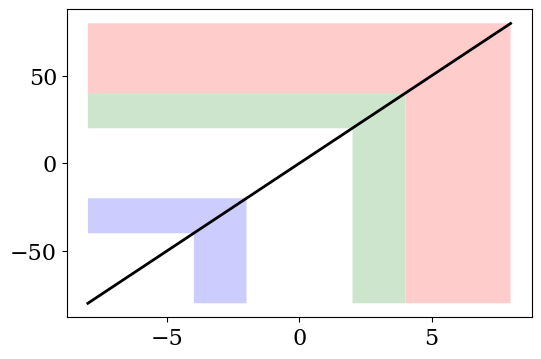

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 800x600 with 2 Axes>

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 1000x600 with 1 Axes>

In [12]:
from circuit_demos import ADCModel

time_seconds = np.linspace(0, 2 * np.pi, 100)
signal_volts = np.sin(time_seconds)
adc_model = ADCModel(bit_depth=2)
adc_model.quantize_signal(time_seconds=time_seconds, input_signal=signal_volts)
adc_model.plot_signals()

This is relatively straightforward. But what happens when the signal we need to convert to the digital domain is more interesting? What if it has multiple components and some are stronger than others?


In [13]:
time_seconds = np.linspace(0, 2 * np.pi, 100)
signal_volts = np.sin(time_seconds) + 0.1 * np.sin(10 * time_seconds)
adc_model = ADCModel(bit_depth=2)
adc_model.quantize_signal(time_seconds=time_seconds, input_signal=signal_volts)
adc_model.plot_signals()

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 1000x600 with 1 Axes>

Even though the input signal was different, the output signal is exactly the same!

Often, nonlinear processes can result in lost information. We intuitively think of this in spatial dimensions when we see an image that is pixelated. As we can see by looking at the output of the ADC, we can lose fidelity in the intensity of each pixel in the image just as we can lose spatial fidelity. The percepts captured by a camera's scheme for measuring the real world are not equivalent to the objects being perceived.

These considerations will prove important when we consider how errors in the sensors which collect our data will affect the performance of machine learning models we derive from that data.

#### Growth

Our last example of nonlinearity is in the practical manifestation of exponential growth in the wild. We take this example from Richard Hamming's lecture notes published in "On the Art of Doing Science and Engineering". The simplest model of growth assumes the rate of growth is proportional to the current ize of a population. For example, the more animals in a population the faster they will be able to reproduce. The differential equation

$$
\frac{\mathrm{d}y}{\mathrm{d}t} = ky
$$

with solution

$$
y(t) = A e^{kt}
$$

describes this type of growth. However, population growth, like all other things, is subject to practical limitations. The amount of food available, for example, may limit the growth of the population. If we add a limit, $L$ to the growth model, equation which describes the population growth is now given by

$$
\frac{\mathrm{d}y}{\mathrm{d}t} = ky(L-y).
$$

Setting $y=Lz$ and $x = \frac{t}{kL^2}$ we have a reduced form,

$$
\frac{\mathrm{d}z}{\mathrm{d}x} = z(1-z).
$$

Solving this differential equation yields a more practical solution for population growth,

$$
z = \frac{1}{1 + (1/A)e^{-x}},
$$

where $A$ is determined by the initial conditions.


In [14]:
x = np.linspace(-10, 10, 50)


def sigmoid(x, a):
    return 1 / (1 + (1 / a) * np.exp(-x))


y = sigmoid(x, a=1)

# Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.plot(x, y, color="k")
ax.set_title(r"$y = \frac{1}{1 + e^{-x}}$", usetex=True)
ax.set_xlabel(r"$x$", usetex=True)
ax.set_ylabel(r"$y$", usetex=True)
plt.tight_layout()
plt.show()

RuntimeError: Failed to process string with tex because latex could not be found

If this looks familiar, this is just the hyperbolic tangent shifted up and scaled between $0$ and $1$. Nature is full of these functions which reach limits at their extremes.

## Motivating Use of Nonlinear Functions in Algorithms

Nonlinear functions arise throughout nature due to the limits of the natural world, and similarly arise throughout neurobiology, for their utility allowing us to perceive and act in the natural world. It is often the exploitation of (rather than the avoidance of) nonlinearity in system designs that enables accounting for the limits of the real world most effectively in practice.

Consider perception in a time-critical scenario, like playing sports. (Or, if we want to imagine an earlier time period, imagine hunting for survival!) In either scenario, our brains only have finite energy from which to make decisions which must occur at a fast pace to be relevant and help achieve our goal of succeeding in competition (or surviving). As we receive percepts from the environment, we must decide how to act on them faster than our competition or prey. If each potential percept in our environment generated signals at each part of our nervous system, we would be overwhelmed with information, our decision processes would slow down (due to our finite processing power) and we would fail to succeed in competition. If we are engaged in playing a sport, it is unlikely we're distracted by some small detail of an object outside the playing field, even if that object is in our visual field of regard. If we are distracted by such irrelevant details, it is unlikely we'll win. If we're engaged in hunting for our next meal, it is unlikely we are distracted by small details irrelevant to finding and tracking our prey. If we are, it is unlikely we'll survive very long. Non-rigorously, we can observe a kind of natural law that *requires* nonlinearity in order to reduce infinite possible input information into to the few relevant details that we need to observe percepts and use our limited brains and physical strength to survive. Instead, our nervous systems are full of gates which combine information from prior nodes, and then only pass information onto the next nodes if that information excites some nonlinear function. The nodes do not pass on information proportional to the inputs received (how could they when they only have a finite amount of ions through which to general electrical potentials?). Instead, information is passed along parsimoniously, only if a given threshold is met.

The poetic irony of this is that through exploiting (rather than avoiding) the limits of the natural world, i.e., by employing the nonlinearity in the biological mechanisms which enable us to perceive and act. This principle is ubiquitous in the design of practical systems which must succeed in the natural world, and effectively interface with humans. No one would listen to a radio that played all channels at once. No one would want to sit behind a security camera that alerted them of all objects in a field of view (do we want to be alerted of every blade of grass?). No one would trust a medical test incapable of discerning the indicators of a disease from artifacts the process used to collect the samples under test. For scientists with the professional goal of extending the limits of human knowledge, for engineers with the professional goal of extending the limits of the systems humans can build, and specifically for data scientists with the professional goal of developing models with predictive power beyond the limits of the data set from which the they were tuned, this principle is critically important to keep in mind.


## Why Nonlinear Functions are Useful - Helpful Properties

* Selectivity
* Flexibility
* Chaining / nesting

## Why Nonlinear Functions are Dangerous - Tricky Pitfalls

* Selectivity isn't always a good thing...
    - no way to recover lost data
* There is no such thing as a free lunch...
* When you're wrong you're really wrong...
* Difficult of analysis

 - RESTNET - Architecture?
 - No Free Lunch Theorem
   - No matter how good the algorithm becomes better, there is some other disadvantages.

 - If in beginning of Non linear network chain, we are wrong that goes onto other layers messing up from the expected result.

## Common Misunderstandings

* Confusion between **nonlinearity(may create appearance of nondeterminism), chaos, and nondeterminism(stochastic)**
     - mitigation ro combat risk between non deterministic and non linearity.
     - For Generative LLM, the non determinism is very high. 
     - Sensitivty to same input.

     - CHAOS
        - sensitivity to input when output cannot be predictive, or disproportional/ unpredictable.
* Confusion between piecewise linearity and linearity
     - Rayleigh function alternative for sigmoid as an activation function.

     algorithm related to biology -> hyperbolic tangents very effective as activation function choice. 
